In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
URL="https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#"
TABLE_NAME = "Коефіцієнт народжуваності в регіонах України"
df = pd.read_html(URL, match=TABLE_NAME)
df=df[0]
#Вивести перші рядки таблиці за допомогою методу head#
df.head()


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [ ]:
#Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
df.shape

(28, 9)

In [ ]:
df.columns

Index(['Регіон', '1950', '1960', '1970', '1990', '2000', '2012', '2014',
       '2019'],
      dtype='object')

In [ ]:
#Замініть у таблиці значення "—" на значення NaN
df.replace("—", np.nan, inplace=True)
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,NaN
5,Житомирська,261.0,223.0,159.0,129,89,122,120,79
6,Закарпатська,314.0,273.0,207.0,168,115,151,146,104
7,Запорізька,219.0,197.0,150.0,124,71,106,106,68
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122,88
9,Київська,204.0,189.0,156.0,123,73,122,121,80


In [ ]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

In [ ]:
df.describe()

,1950,1960,1970,1990,2000,2012
count,26.000000,27.000000,27.000000,28.000000,28.000000,28.000000
mean,230.923077,207.481481,155.851852,130.428571,82.071429,116.464286
std,28.220451,29.360322,18.703565,15.278716,15.568079,16.362745
min,186.000000,163.000000,127.000000,108.000000,61.000000,94.000000
25%,211.500000,186.500000,144.000000,122.250000,70.750000,104.500000
50%,226.000000,204.000000,152.000000,126.000000,78.500000,114.500000
75%,246.000000,220.500000,163.000000,140.500000,89.500000,122.500000
max,314.000000,273.000000,207.000000,168.000000,118.000000,159.000000


In [ ]:
#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
df['2014'] = df['2014'].astype('float')
df['2019'] = df['2019'].astype('float')
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object

In [ ]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
missing_percentages = df.isnull().sum() / len(df) * 100
missing_percentages

Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64

In [ ]:
#Видаліть з таблиці дані по всій країні, останній рядок таблиці
df = df.drop([27])

In [ ]:
df.tail()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
22,Черкаська,205.000000,179.000000,144.000000,123,75,100,98.000000,64.000000
23,Чернівецька,247.000000,218.000000,170.000000,148,101,128,129.000000,92.000000
24,Чернігівська,220.000000,183.000000,127.000000,108,69,94,90.000000,61.000000
25,Київ,230.923077,174.000000,159.000000,120,73,120,121.000000,110.000000
26,Севастополь,230.923077,207.481481,155.851852,125,70,120,111.423077,80.208333


In [ ]:
df.loc[:, '1950':'2019']

,1950,1960,1970,1990,2000,2012,2014,2019
0,230.0,206.0,160.0,130,73,126,NaN,NaN
1,224.0,192.0,142.0,124,84,112,109.0,76.0
2,247.0,250.0,179.0,153,112,148,141.0,101.0
3,204.0,204.0,151.0,123,71,112,111.0,71.0
4,271.0,214.0,140.0,109,61,98,82.0,NaN
5,261.0,223.0,159.0,129,89,122,120.0,79.0
6,314.0,273.0,207.0,168,115,151,146.0,104.0
7,219.0,197.0,150.0,124,71,106,106.0,68.0
8,243.0,248.0,182.0,155,103,124,122.0,88.0
9,204.0,189.0,156.0,123,73,122,121.0,80.0


In [ ]:
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
n_columns = df.select_dtypes(include='number')
df=df.fillna({col: df[col].mean() for col in n_columns.columns})
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.00,206.000000,160.0,130,73,126,111.44,80.173913
1,Вінницька,224.00,192.000000,142.0,124,84,112,109.00,76.000000
2,Волинська,247.00,250.000000,179.0,153,112,148,141.00,101.000000
3,Дніпропетровська,204.00,204.000000,151.0,123,71,112,111.00,71.000000
4,Донецька,271.00,214.000000,140.0,109,61,98,82.00,80.173913
5,Житомирська,261.00,223.000000,159.0,129,89,122,120.00,79.000000
6,Закарпатська,314.00,273.000000,207.0,168,115,151,146.00,104.000000
7,Запорізька,219.00,197.000000,150.0,124,71,106,106.00,68.000000
8,Івано-Франківська,243.00,248.000000,182.0,155,103,124,122.00,88.000000
9,Київська,204.00,189.000000,156.0,123,73,122,121.00,80.000000


In [ ]:
df.describe()

,1950,1960,1970,1990,2000,2012,2014,2019
count,25.000000,26.000000,26.000000,27.000000,27.000000,27.000000,25.000000,23.000000
mean,231.040000,207.576923,156.000000,130.592593,82.222222,116.555556,111.440000,80.173913
std,28.795949,29.937499,19.057807,15.544624,15.843789,16.667179,20.530628,14.828266
min,186.000000,163.000000,127.000000,108.000000,61.000000,94.000000,51.000000,60.000000
25%,211.000000,185.250000,144.000000,121.500000,70.500000,103.000000,101.000000,68.000000
50%,224.000000,201.000000,153.000000,126.000000,79.000000,115.000000,112.000000,79.000000
75%,247.000000,221.750000,164.500000,141.000000,90.000000,123.000000,121.000000,88.000000
max,314.000000,273.000000,207.000000,168.000000,118.000000,159.000000,148.000000,110.000000


In [ ]:
df['2019'].mean()

80.20833333333334

In [ ]:
#Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
high_birth_rate_regions = df[df['2019'] > df['2019'].mean()]
high_birth_rate_regions = high_birth_rate_regions[['Регіон', '2019']]
high_birth_rate_regions

,Регіон,2019
2,Волинська,101.0
6,Закарпатська,104.0
8,Івано-Франківська,88.0
12,Львівська,87.0
14,Одеська,88.0
16,Рівненська,107.0
20,Херсонська,81.0
23,Чернівецька,92.0
25,Київ,110.0


In [ ]:
#У якому регіоні була найвища народжуваність у 2014 році?
max_birth_rate_regions = df[df['2014'] == df['2014'].max()]
max_birth_rate_regions = max_birth_rate_regions[['Регіон', '2014']]
max_birth_rate_regions

,Регіон,2014
16,Рівненська,148.0


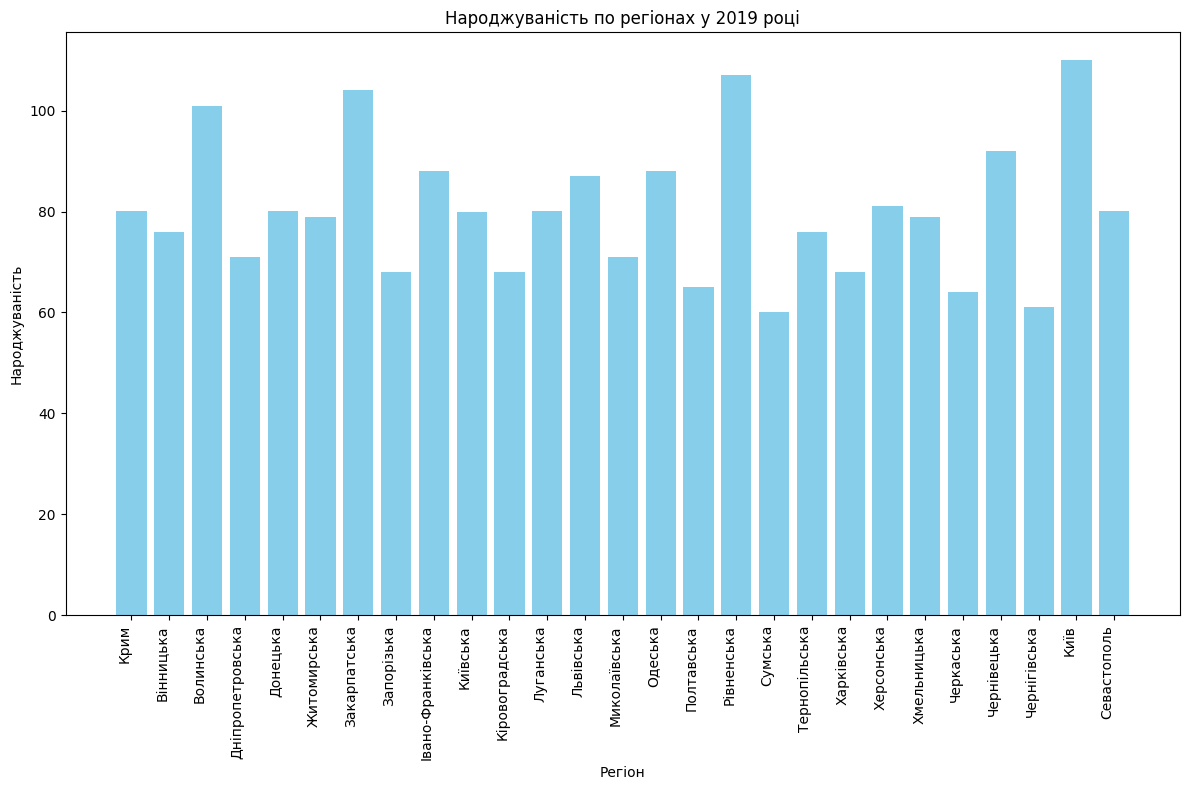

In [ ]:
#Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
plt.figure(figsize=(12, 8))
plt.bar(df['Регіон'], df['2019'], color='skyblue')
plt.title('Народжуваність по регіонах у 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

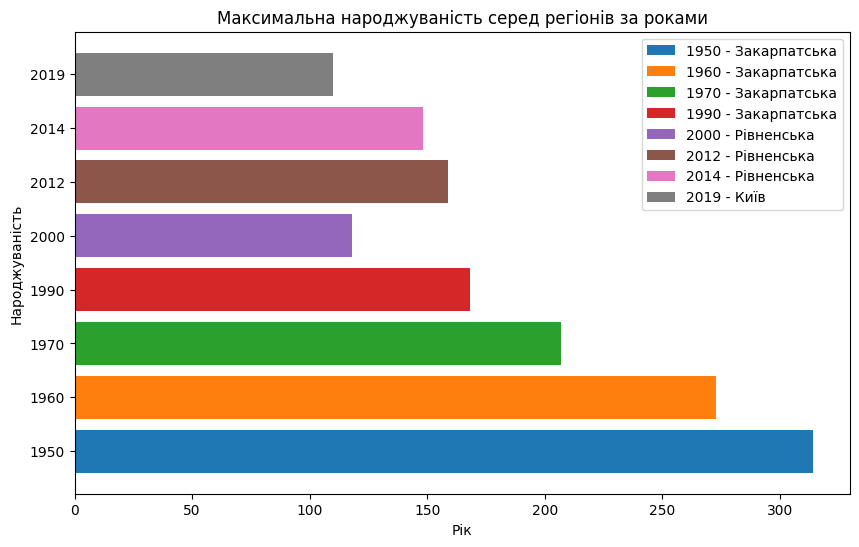

In [ ]:
#Визначення регіону з максимальною народжуваністю для кожного року
max_births = df.loc[:, '1950':'2019'].idxmax(axis=0)
max_births = max_births.apply(lambda x: df.at[df.index[0], 'Регіон'] if x == 0 else df.at[x, 'Регіон'])
plt.figure(figsize=(10, 6))
for year, region in max_births.items():
    plt.barh(year, df.at[df[df['Регіон'] == region].index[0], year], label=f'{year} - {region}')
plt.title('Максимальна народжуваність серед регіонів за роками')
plt.xlabel('Рік')
plt.ylabel('Народжуваність')
plt.legend()
plt.show()

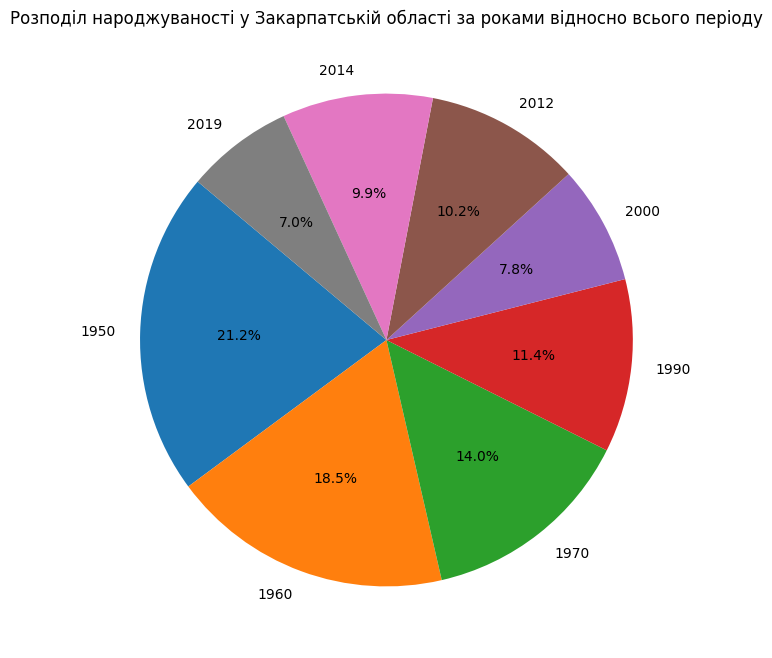

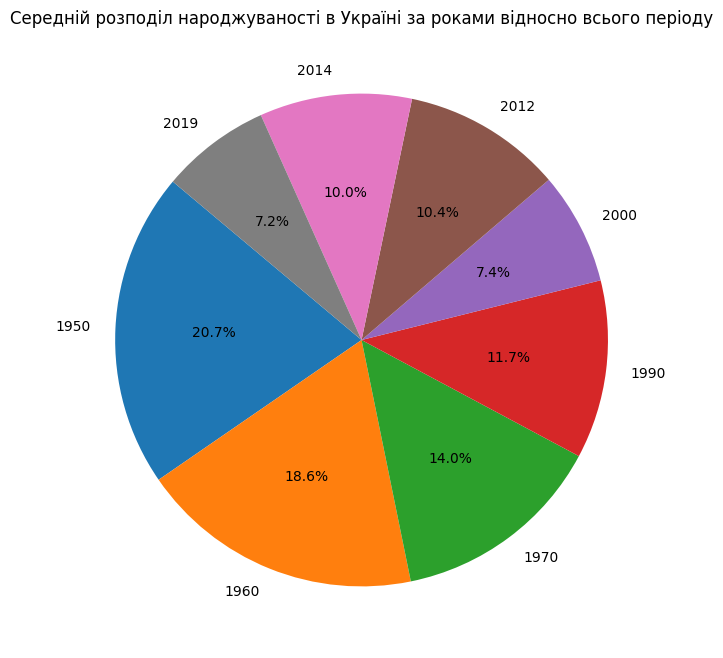

In [ ]:
#Розподіл народжуваності у Закарпатській області та середньої по Україні за роками відносно всього періоду
region_to_plot = ['Закарпатська']
selected_region_data = df[df['Регіон'].isin(region_to_plot)]
plt.figure(figsize=(8, 8))
plt.pie(selected_region_data.iloc[:, 1:].mean(), labels=df.columns[1:], autopct='%1.1f%%', startangle=140)
plt.title('Розподіл народжуваності у Закарпатській області за роками відносно всього періоду')
plt.show()
plt.figure(figsize=(8, 8))
plt.pie(df.iloc[:, 1:].mean(), labels=df.columns[1:], autopct='%1.1f%%', startangle=140)
plt.title('Середній розподіл народжуваності в Україні за роками відносно всього періоду')
plt.show()